Estructura
Datos de:
* Moby Dick
* Typee
* Omoo
* Billy Budd

Requisitos
* numpy
* panda
* matplotlib
* seaborn
* nltk

Importar herramientas: nltk, pandas, matplotlib, seaborn:

In [6]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download ('wordnet')
nltk.download ('averaged_perceptron_tagger')

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

def load_text(path):
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/clarabueno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clarabueno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/clarabueno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/clarabueno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Cambiar la apariencia de los gráficos, para más adelante:

In [7]:
plt.style.use('dark_background')

Cargar los libros que vamos a analizar:

In [8]:
with open ("moby_dick.rtf", encoding="utf-8") as f: moby = f.read()
with open ("omoo.rtf", encoding="utf-8") as f: omoo = f.read()
with open ("typee.rtf", encoding="utf-8") as f: typee = f.read()
with open ("billy_budd.rtf", encoding="utf-8") as f: budd = f.read()

Los .rtf son bastante sucios, así que vamos a limpiarlos un poco más:

In [9]:
import re

def clean_rtf(rtf_text):
    text = re.sub(r'{\\.*?}|\\[a-z]+\d* ?|[\{\}]', '', rtf_text)
    text = re.sub(r'\n|\r', ' ', text)
    return text


def preprocess(text, lang="english"):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)  
    text = re.sub(r'[^\w\sáéíóúüñ]', '', text) 
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words(lang))
    tokens = [t for t in tokens if t not in stop_words and t.isalpha()]
    
    return tokens

Ahora, el procesamiento:
* Eliminar mayúsculas.
* Tokenización.
* Eliminar puntuación y stopwords.

In [10]:
import string
def preprocess (text, lang="english"):
    tokens = word_tokenize (text.lower())
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [token for token in tokens if not token.isdigit()]
    tokens = [t for t in tokens if t.isalpha()]
    stop_words = set (stopwords.words(lang))
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

tokens_omoo = preprocess (omoo, lang="english")
tokens_moby = preprocess (moby, lang="english")
tokens_typee = preprocess (typee, lang="english")
tokens_budd = preprocess (budd, lang="english")

Vamso a ver cuántas palabras únicas hay en cada una de las novelas:

In [14]:
vocab_moby = set(tokens_moby)
vocab_omoo = set(tokens_omoo)
vocab_typee = set(tokens_typee)
vocab_budd = set(tokens_budd)

print(f"Moby Dick: {len(vocab_moby)} palabras únicas")
print(f"Omoo: {len(vocab_omoo)} palabras únicas")
print(f"Typee: {len(vocab_typee)} palabras únicas")
print(f"Billy Budd: {len(vocab_budd)} palabras únicas")

Moby Dick: 15643 palabras únicas
Omoo: 9674 palabras únicas
Typee: 9769 palabras únicas
Billy Budd: 5154 palabras únicas


Análisis de frecuencia:

In [11]:
freq_omoo = Counter (tokens_omoo).most_common(30)
freq_typee = Counter (tokens_typee).most_common(30)
freq_moby = Counter (tokens_moby).most_common(30)
freq_budd = Counter (tokens_budd).most_common(30)

df_omoo = pd.DataFrame (freq_omoo, columns=["Palabra", "Frecuencia"])
df_moby = pd.DataFrame (freq_moby, columns=["Palabra", "Frecuencia"])
df_budd = pd.DataFrame (freq_budd, columns=["Palabra", "Frecuencia"])
df_typee = pd.DataFrame (freq_typee, columns=["Palabra", "Frecuencia"])

Visualización:

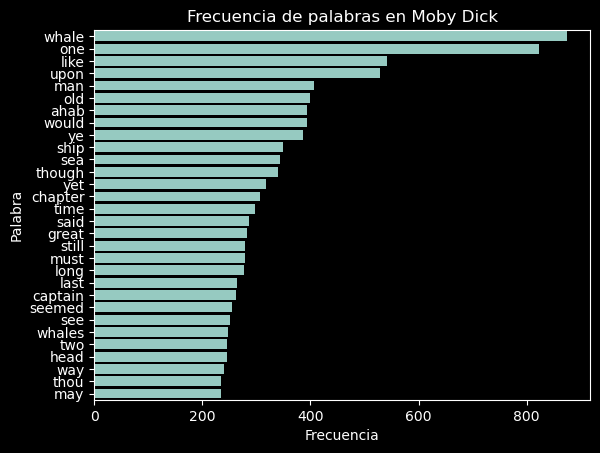

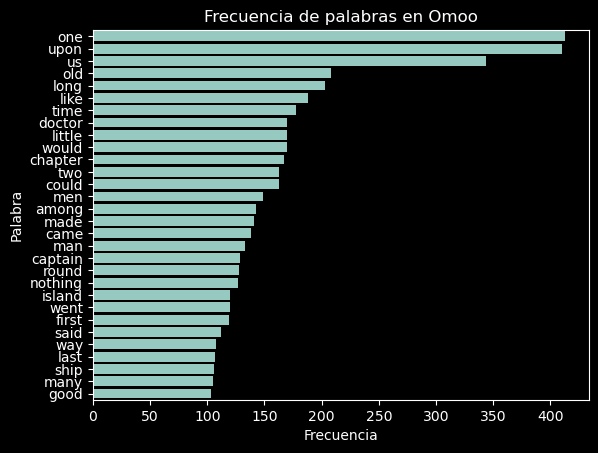

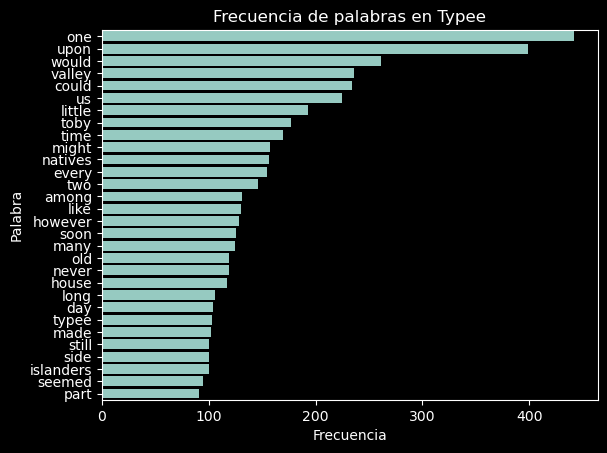

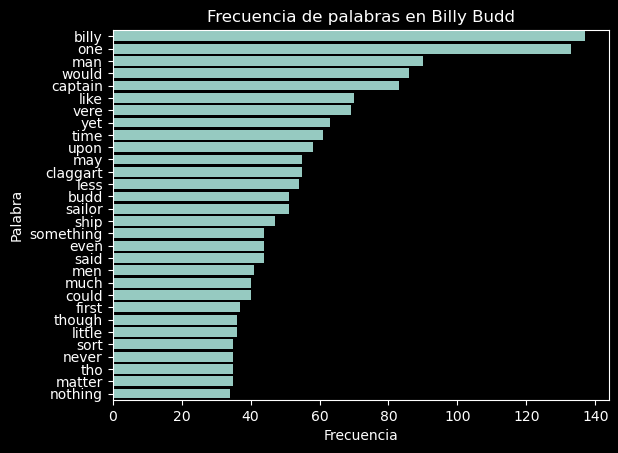

In [12]:
sns.barplot(x="Frecuencia", y="Palabra", data=df_moby)
plt.title("Frecuencia de palabras en Moby Dick")
plt.show()

sns.barplot(x="Frecuencia", y="Palabra", data=df_omoo)
plt.title("Frecuencia de palabras en Omoo")
plt.show()

sns.barplot(x="Frecuencia", y="Palabra", data=df_typee)
plt.title("Frecuencia de palabras en Typee")
plt.show()

sns.barplot(x="Frecuencia", y="Palabra", data=df_budd)
plt.title("Frecuencia de palabras en Billy Budd")
plt.show()

Una nube de palabras:

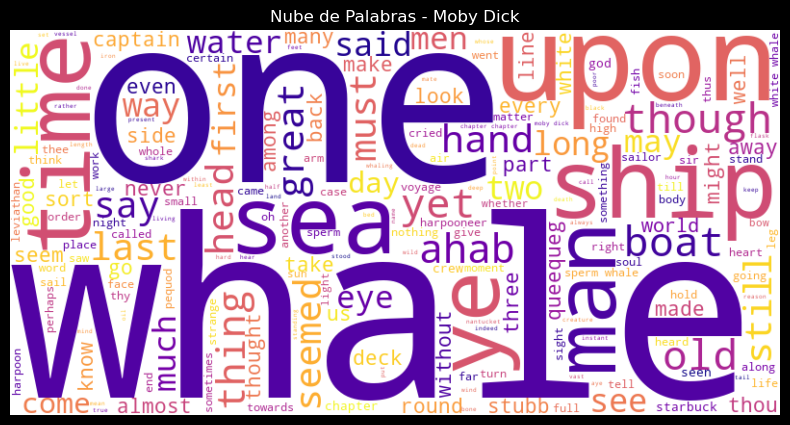

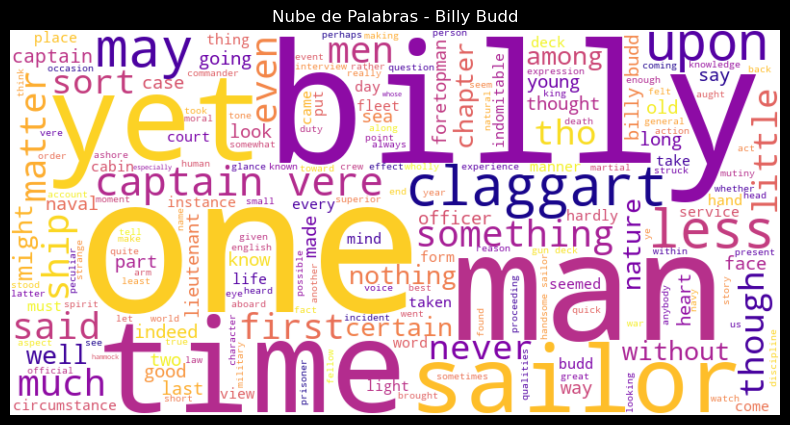

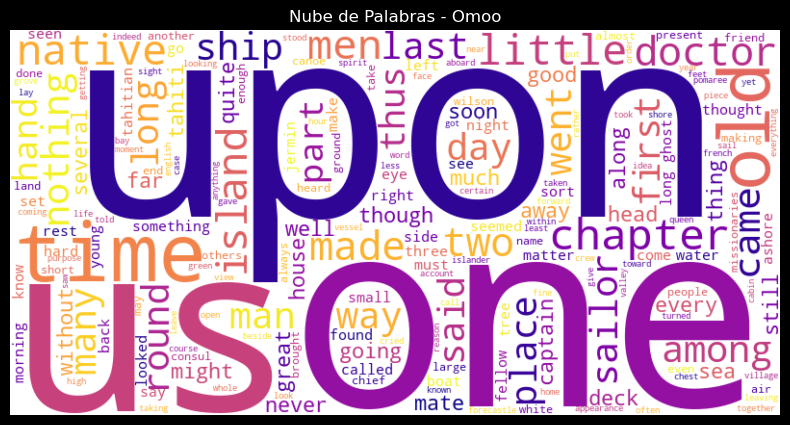

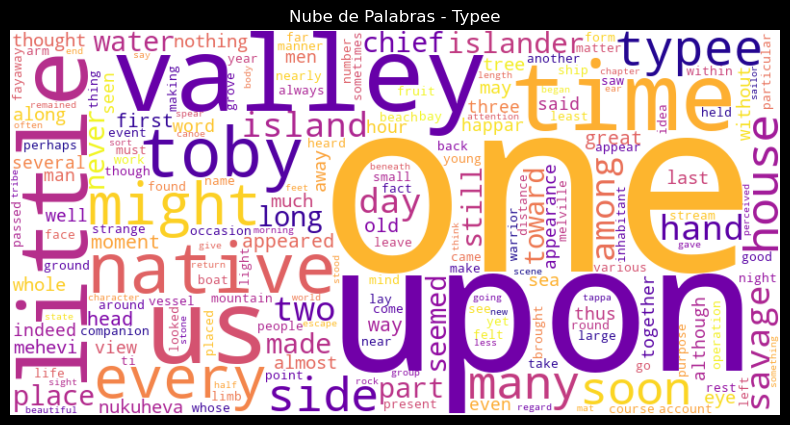

In [13]:
text_moby = ' '.join(tokens_moby)

wordcloud_moby = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text_moby)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_moby, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Moby Dick")
plt.show()

text_budd = ' '.join(tokens_budd)

wordcloud_budd = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text_budd)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_budd, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Billy Budd")
plt.show()

text_omoo = ' '.join(tokens_omoo)

wordcloud_omoo = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text_omoo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_omoo, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Omoo")
plt.show()

text_typee = ' '.join(tokens_typee)

wordcloud_typee = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text_typee)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_typee, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras - Typee")
plt.show()